# Import libraries

In [1]:
import numpy as np
import pandas as  pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Since we are going to mae lot of visualization, let's set some visualization parameters in order to have same plots size
plt.rcParams['figure.figsize'] = [12,6]
sns.set_style('darkgrid')

In [3]:
#Read the data from csv file

df_house = pd.read_csv('Maison.csv')
df_house.head()

,PRIX,SUPERFICIE,CHAMBRES,SDB,ETAGES,ALLEE,SALLEJEU,CAVE,GAZ,AIR,GARAGES,SITUATION
0,42000,5850,3,1,2,1,0,1,0,0,1,0
1,38500,4000,2,1,1,1,0,0,0,0,0,0
2,49500,3060,3,1,1,1,0,0,0,0,0,0
3,60500,6650,3,1,2,1,1,0,0,0,0,0
4,61000,6360,2,1,1,1,0,0,0,0,0,0


# Data Transformations & Analysis

In [4]:
df_house = df_house.rename(index = str,
                    columns = {'PRIX':'Price', 'SUPERFICIE':'Area', 'CHAMBRES':'Rooms', 'SDB':'Bathroom', 'ETAGES':'Floors',
                               'ALLEE':'Driveway', 'SALLEJEU':'Game_room', 'CAVE':'Cellar', 'GAZ':'Gas', 'AIR':'Air',
                               'GARAGES':'Garage', 'SITUATION':'Situation'})

In [5]:
df_house.head()

,Price,Area,Rooms,Bathroom,Floors,Driveway,Game_room,Cellar,Gas,Air,Garage,Situation
0,42000,5850,3,1,2,1,0,1,0,0,1,0
1,38500,4000,2,1,1,1,0,0,0,0,0,0
2,49500,3060,3,1,1,1,0,0,0,0,0,0
3,60500,6650,3,1,2,1,1,0,0,0,0,0
4,61000,6360,2,1,1,1,0,0,0,0,0,0


In [6]:
#Shape of dataset

df_house.shape

(546, 12)

In [7]:
# Getting basic information of dataset

df_house.info()

<class 'pandas.core.frame.DataFrame'>
Index: 546 entries, 0 to 545
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Price      546 non-null    int64
 1   Area       546 non-null    int64
 2   Rooms      546 non-null    int64
 3   Bathroom   546 non-null    int64
 4   Floors     546 non-null    int64
 5   Driveway   546 non-null    int64
 6   Game_room  546 non-null    int64
 7   Cellar     546 non-null    int64
 8   Gas        546 non-null    int64
 9   Air        546 non-null    int64
 10  Garage     546 non-null    int64
 11  Situation  546 non-null    int64
dtypes: int64(12)
memory usage: 55.5+ KB


In [8]:
# Getting Five number summery of Numerical columns

df_house.describe()

,Price,Area,Rooms,Bathroom,Floors,Driveway,Game_room,Cellar,Gas,Air,Garage,Situation
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,68121.597070,5150.265568,2.965201,1.285714,1.807692,0.858974,0.177656,0.349817,0.045788,0.316850,0.692308,0.234432
std,26702.670926,2168.158725,0.737388,0.502158,0.868203,0.348367,0.382573,0.477349,0.209216,0.465675,0.861307,0.424032
min,25000.000000,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,49125.000000,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,62000.000000,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,82000.000000,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,190000.000000,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000


In [9]:
# Checking for null values

df_house.isnull().sum()   #There is no null values in the dataset

Price        0
Area         0
Rooms        0
Bathroom     0
Floors       0
Driveway     0
Game_room    0
Cellar       0
Gas          0
Air          0
Garage       0
Situation    0
dtype: int64

In [10]:
# Checking unique values in each column

df_house.nunique().sort_values(ascending=False)

Area         284
Price        219
Rooms          6
Bathroom       4
Floors         4
Garage         4
Driveway       2
Game_room      2
Cellar         2
Gas            2
Air            2
Situation      2
dtype: int64

In [11]:
house = df_house

# Correlation Check

<AxesSubplot:>

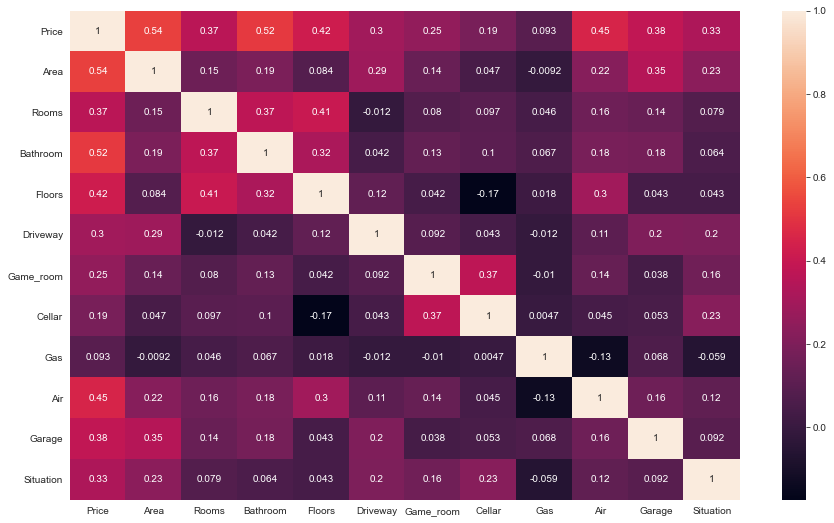

In [12]:
# Checking correlation between numerical variables

correlations = house.corr()
plt.subplots(figsize=(15,9))
sns.heatmap(correlations, annot=True)

In [13]:
def correlation(dataset, threshold):
    col_corr = list() # list of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j] >= threshold):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.append(colname)
    return col_corr

In [14]:
corr_feature = correlation(house, 0.75)
len(set(corr_feature))

0

In [15]:
corr_feature  #There is no correlated variables in dataset

[]

# Cheking for the Zero Variance

In [16]:
selector = VarianceThreshold(threshold=0)
selector.fit(house)

VarianceThreshold(threshold=0)

In [17]:
selector.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [18]:
house.columns[selector.get_support()]

Index(['Price', 'Area', 'Rooms', 'Bathroom', 'Floors', 'Driveway', 'Game_room',
       'Cellar', 'Gas', 'Air', 'Garage', 'Situation'],
      dtype='object')

In [19]:
# Get features which have the variance less than the set threshold values using list comprehension

selected_cols = [column for column in house.columns if column not in house.columns[selector.get_support()]]

In [20]:
selected_cols   #There is no zero variance columns 

[]

In [21]:
house.columns

Index(['Price', 'Area', 'Rooms', 'Bathroom', 'Floors', 'Driveway', 'Game_room',
       'Cellar', 'Gas', 'Air', 'Garage', 'Situation'],
      dtype='object')

# Distribution of attributes

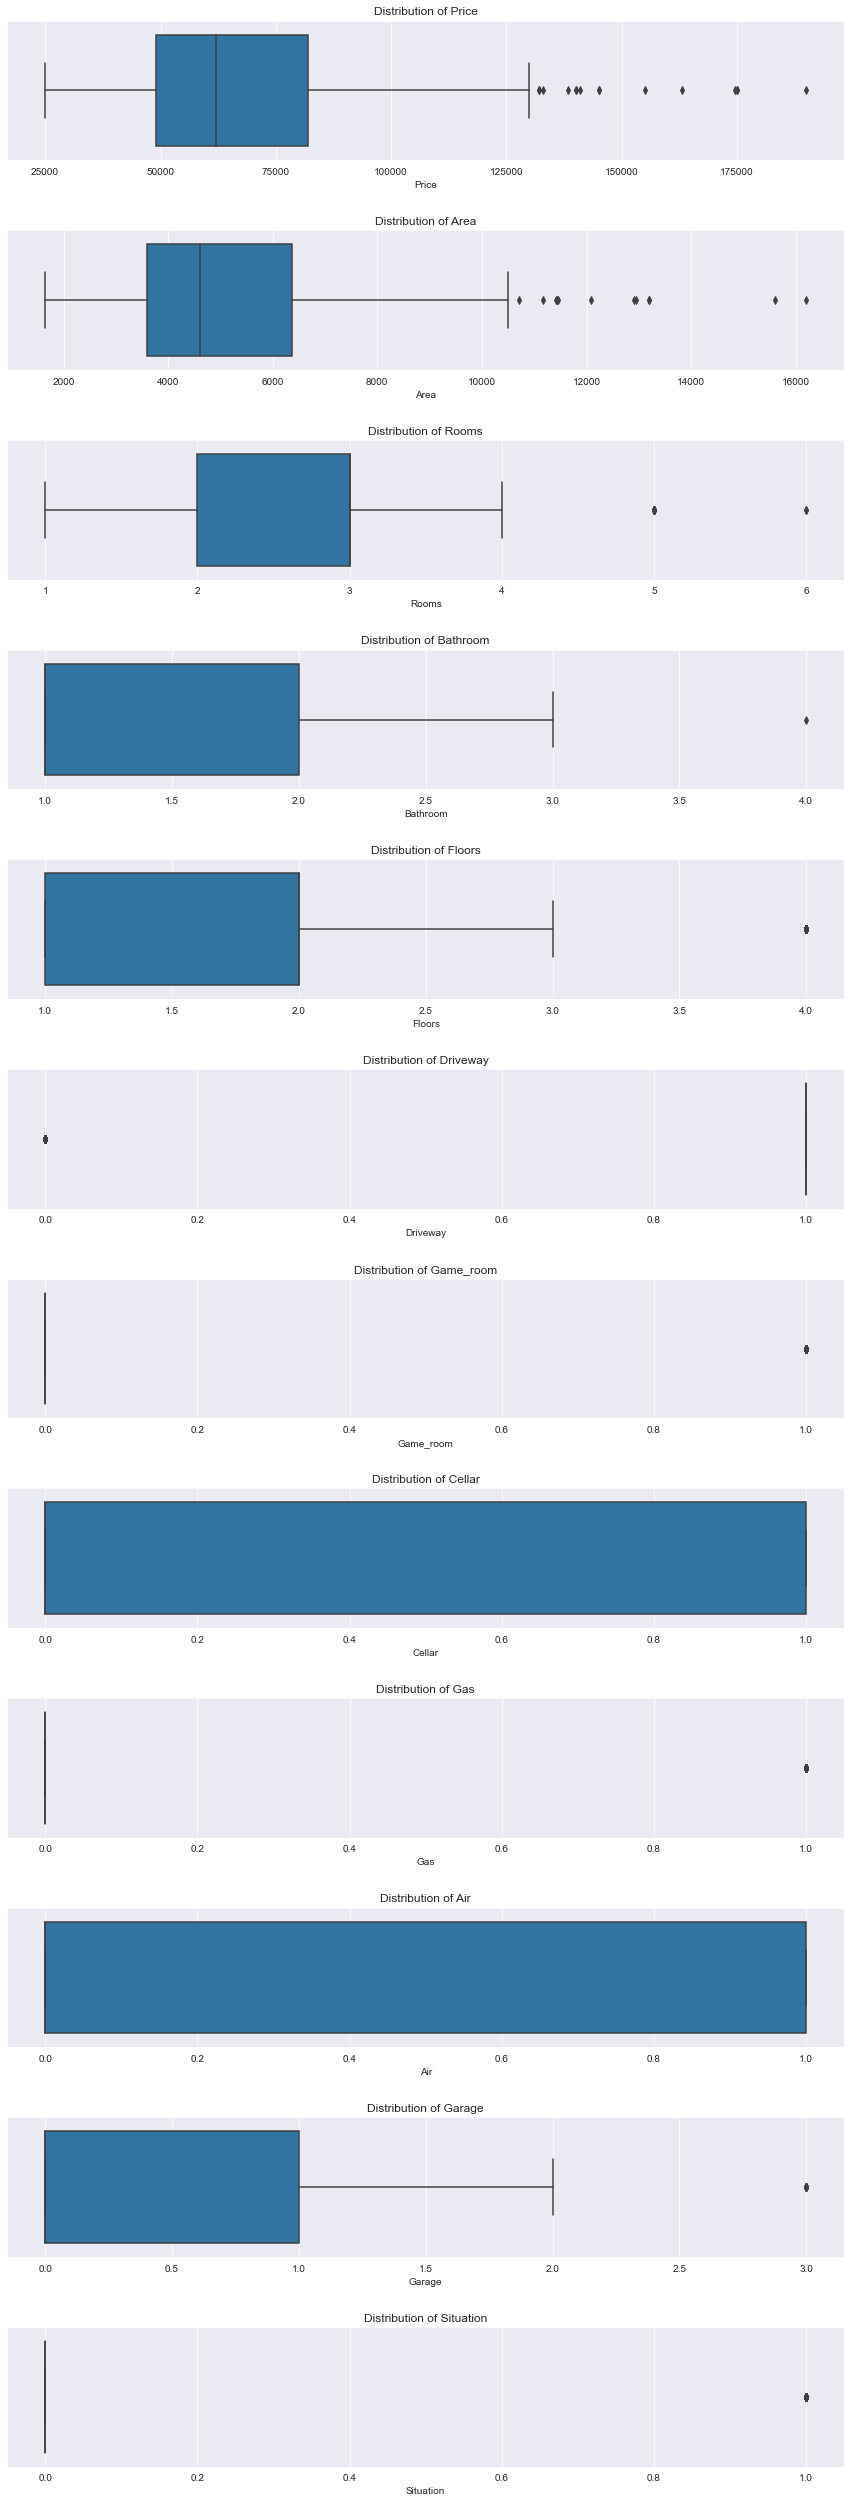

In [22]:
fig, ax = plt.subplots(nrows=12, ncols=1, figsize=(15, 45)) # create subplots
fig.subplots_adjust(hspace=.5) # adjust space between plots

for i, col in enumerate(house):
    sns.boxplot(x=house[col], ax=ax[i])
    ax[i].set_title('Distribution of {}'.format(col))

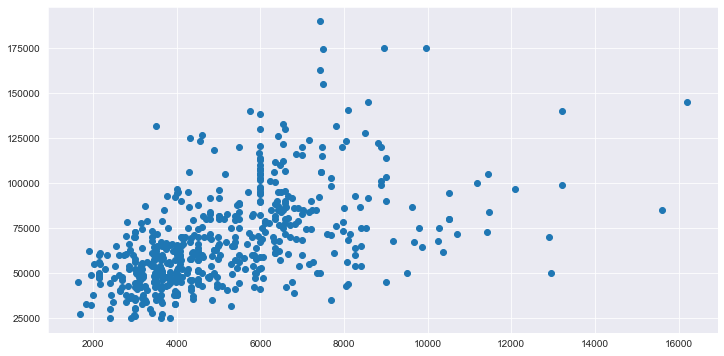

In [23]:
# Let's see we have a linear relation between price and area

plt.scatter(house['Area'], house['Price'])
plt.show()

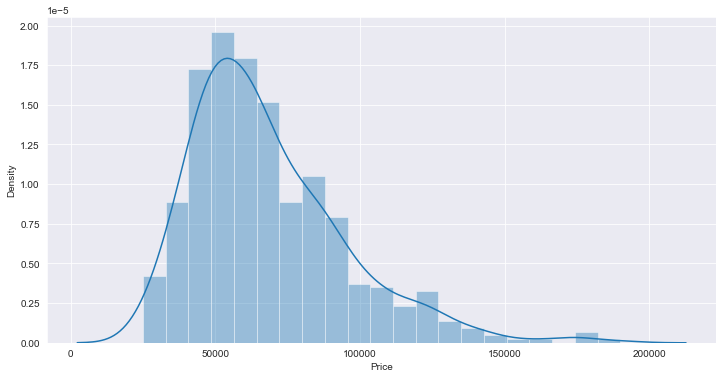

In [24]:
sns.distplot(house['Price'])
plt.show()

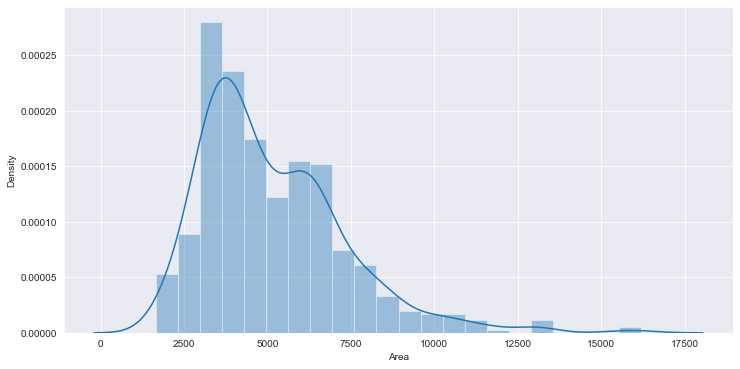

In [25]:
sns.distplot(house['Area'])
plt.show()

# Handling Outliers by Capping and Flooring

In [26]:
# define a function called 'iqr_outliers_cap_floor'
# IQR = Q3 - Q1
# +/- 1.5 * IQR

def iqr_outliers_cap_floor(df, cols, factor):
    for ft in cols:
        Q1 = df[ft].quantile(0.25)
        Q3 = df[ft].quantile(0.75)
        IQR = Q3 - Q1
    
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR
        
        df[ft] = np.where(df[ft] > upper_limit, upper_limit, np.where(df[ft] < lower_limit, lower_limit, df[ft]))

In [27]:
# Calling function 'iqr_outliers_cap_floor'

columns_list = [['Price', 'Area', 'Rooms', 'Bathroom', 'Floors', 'Driveway', 'Game_room', 'Cellar', 'Gas', 'Air', 'Garage', 'Situation']]

iqr_outliers_cap_floor(house, columns_list, 1.5)

In [28]:
house.shape

(546, 12)

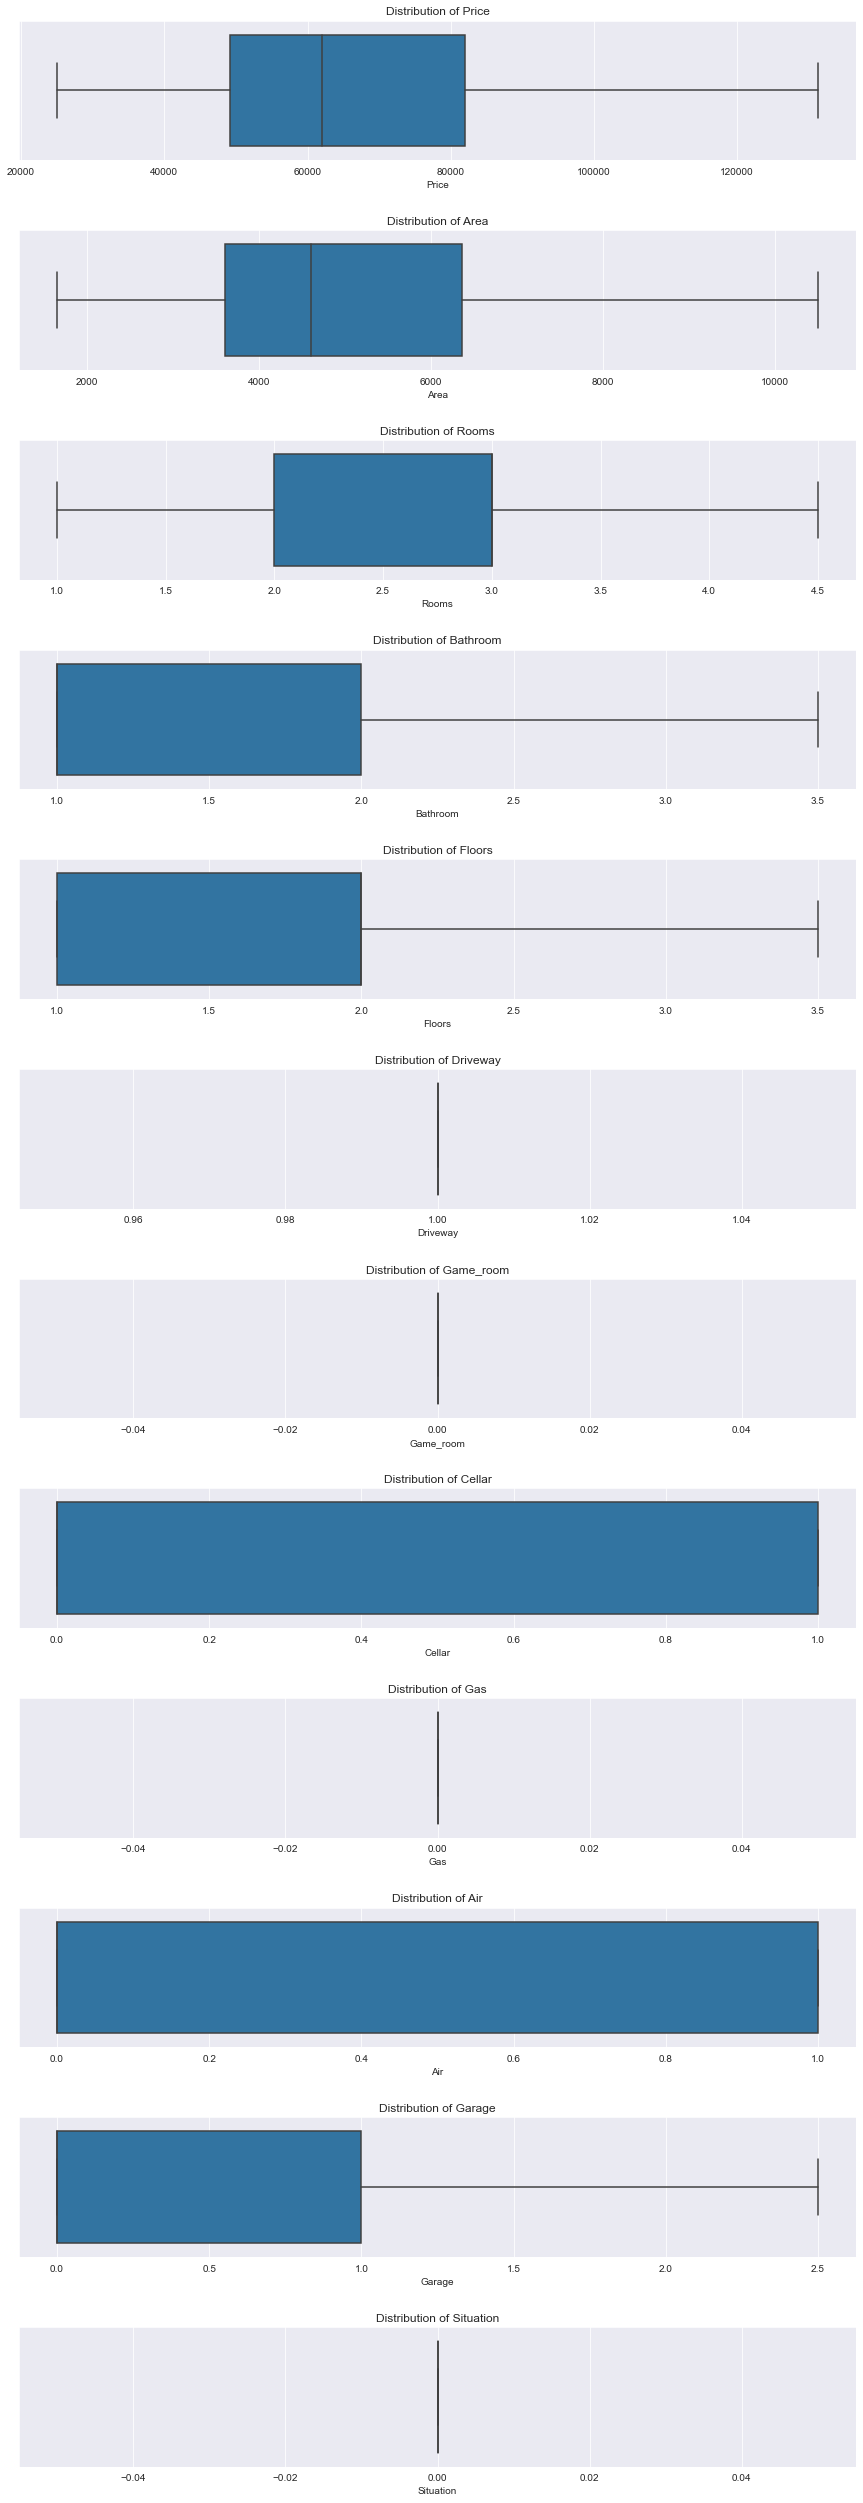

In [29]:
fig, ax = plt.subplots(nrows=12, ncols=1, figsize=(15, 45)) # create subplots
fig.subplots_adjust(hspace=.5) # adjust space between plots

for i, col in enumerate(house):
    sns.boxplot(x=house[col], ax=ax[i])
    ax[i].set_title('Distribution of {}'.format(col))

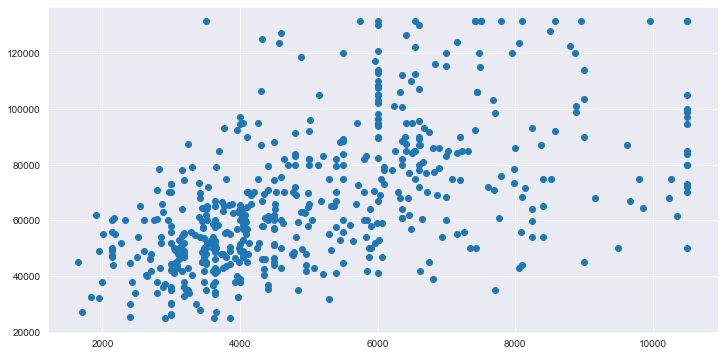

In [30]:
# Let's see we have a linear relation between price and area

plt.scatter(house['Area'], house['Price'])
plt.show()

# Split the data into X and Y

In [31]:
x = house.drop(['Price'], axis = 1).values
y = house['Price'].values

# Standardization & Scaling of Features

In [32]:
std_scaler = StandardScaler()
x = std_scaler.fit_transform(x)

In [33]:
#Split the data into Train-Test

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

# Build the Linear Regression Model

In [34]:
#we now instatiate a Linear Regression object

lm = LinearRegression()

In [35]:
# Now let's build the model using sklearn

lm.fit(x_train, y_train)

LinearRegression()

# Prediction

In [36]:
predictions = lm.predict(x_test)

<AxesSubplot:>

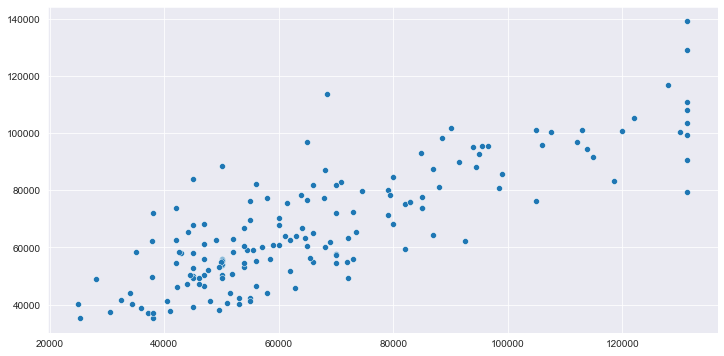

In [37]:
sns.scatterplot(y_test, predictions)

In [38]:
print("Accuracy --> ", lm.score(x_test, y_test)*100)

Accuracy -->  67.19145826673623


In [39]:
x_endog = sm.add_constant(x_test)

In [40]:
res = sm.OLS(y_test, x_endog)
res.fit()

In [41]:
res.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     49.96
Date:                Fri, 26 Nov 2021   Prob (F-statistic):           9.98e-37
Time:                        18:52:54   Log-Likelihood:                -1806.4
No. Observations:                 164   AIC:                             3629.
Df Residuals:                     156   BIC:                             3654.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.752e+04   1189.758     56.752      0.000    6.52e+04    6.99e+04
x1          9742.6202   1341.053      7.265      0.000    7093.654    1.24e+04
x2          1589.1758   1283.703      1.238      0.218    -946.506    4124.858
x3          7825.4616   1239.918      6.311      0.000    5376.267    1.03e+04
x4          5463.6750   1436.895      3.802      0.000    2625.394    8301.956
x5          1.282e-12    1.7e-13      7.527      0.000    9.46e-13    1.62e-12
x6         -5.552e-13   3.86e-13     -1.439      0.152   -1.32e-12    2.07e-13
x7          3590.4113   1199.562      2.993      0.003    1220.932    5959.890
x8                  0          0        nan        nan           0           0
x9          6189.5531   1387.616      4.461      0.000    3448.613    8930.494
x10         1732.0207   1385.013      1.251      0.213   -1003.777    4467.819
x11                 0          0        nan        nan           0           0
==============================================================================
Omnibus:                        2.172   Durbin-Watson:                   2.193
Prob(Omnibus):                  0.338   Jarque-Bera (JB):                2.003
Skew:                           0.004   Prob(JB):                        0.367
Kurtosis:                       3.541   Cond. No.                          inf
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [42]:
x_endog_test = sm.add_constant(x_test)
model = res.fit()
predictions = model.predict(x_endog_test)
# predictions

# Store The Result in csv file

In [43]:
y = pd.DataFrame(x_test)
y['y_test'] = y_test
y['Predictions'] = predictions
y = y.reset_index(drop=True)
y.head()

,0,1,2,3,4,5,6,7,8,9,10,y_test,Predictions
0,-0.050977,0.071026,-0.57283,2.223737,0.0,0.0,-0.733504,0.0,-0.681034,-0.817170,0.0,80000.0,66540.682275
1,-0.960008,1.507336,-0.57283,0.295478,0.0,0.0,1.363319,0.0,1.468356,-0.817170,0.0,47000.0,70263.728123
2,0.748171,1.507336,1.43852,0.295478,0.0,0.0,1.363319,0.0,1.468356,0.382225,0.0,130000.0,104722.984885
3,0.478459,0.071026,-0.57283,-0.990028,0.0,0.0,1.363319,0.0,-0.681034,-0.817170,0.0,47000.0,61668.263246
4,0.440999,0.071026,-0.57283,-0.990028,0.0,0.0,1.363319,0.0,-0.681034,-0.817170,0.0,59000.0,61303.304059


In [44]:
y.columns=[['Area', 'Rooms', 'Bathroom', 'Floors', 'Driveway', 'Game_room', 'Cellar', 'Gas', 'Air', 'Garage', 'Situation','Price','Predictions']]
y.head()

,Area,Rooms,Bathroom,Floors,Driveway,Game_room,Cellar,Gas,Air,Garage,Situation,Price,Predictions
0,-0.050977,0.071026,-0.57283,2.223737,0.0,0.0,-0.733504,0.0,-0.681034,-0.817170,0.0,80000.0,66540.682275
1,-0.960008,1.507336,-0.57283,0.295478,0.0,0.0,1.363319,0.0,1.468356,-0.817170,0.0,47000.0,70263.728123
2,0.748171,1.507336,1.43852,0.295478,0.0,0.0,1.363319,0.0,1.468356,0.382225,0.0,130000.0,104722.984885
3,0.478459,0.071026,-0.57283,-0.990028,0.0,0.0,1.363319,0.0,-0.681034,-0.817170,0.0,47000.0,61668.263246
4,0.440999,0.071026,-0.57283,-0.990028,0.0,0.0,1.363319,0.0,-0.681034,-0.817170,0.0,59000.0,61303.304059


In [45]:
y.to_csv('Regression_prediction_by_cap.csv')